In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from keras.models import Model
from keras.layers import Dense, Input, Dropout, Conv2D, MaxPool2D, Flatten

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy


from PIL import Image
import PIL.ImageOps

Using TensorFlow backend.


In [2]:
data = pd.read_csv("mnist_train_small.csv")

In [3]:
X = data.values[:,2:].reshape(-1,28,28,1)
y = data.values[:,1]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [5]:
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()

In [6]:
X[0][0][0][0].shape

()

In [11]:
in_layer = Input(shape=[28,28,1],name="inp")
conv_1 = Conv2D(32, (3,3), activation="tanh",name="conv1")(in_layer)
pool_1 = MaxPool2D(name="pool1")(conv_1)
conv_2 = Conv2D(64, (3,3), activation="tanh",name="conv2")(pool_1)
pool_2 = MaxPool2D(name="pool2")(conv_2)
conv_3 = Conv2D(128, (3,3), activation="tanh",name="conv3")(pool_2)
pool_3 = MaxPool2D(name="pool3")(conv_3)

flatten = Flatten(name="flatten1")(pool_3)

dense_1 = Dense(200, activation="tanh",name="dense1")(flatten)

dense_2 = Dense(100, activation="tanh",name="dense2")(dense_1)
drop = Dropout(rate=.25,name="drop1")(dense_2)
dense_3 = Dense(50, activation="relu",name="dense3")(drop)
dense_4 = Dense(50, activation="tanh",name="dense4")(dense_3)

out_1 = Dense(10, activation="softmax",name="out")(dense_4)

In [12]:
model = Model(inputs=[in_layer], outputs=[out_1])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 1, 1, 128)         0         
__________

In [14]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

W0710 16:43:24.314358 140566477264704 deprecation_wrapper.py:119] From /home/anurag/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 16:43:24.349082 140566477264704 deprecation_wrapper.py:119] From /home/anurag/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
hist = model.fit(X, y_hot, epochs=10, batch_size=200)

W0710 16:43:25.310609 140566477264704 deprecation.py:323] From /home/anurag/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
8000/8000 [==============================] - 6s 688us/step - loss: 1.3464 - acc: 0.6050
Epoch 2/10
8000/8000 [==============================] - 5s 581us/step - loss: 0.3387 - acc: 0.9149
Epoch 3/10
8000/8000 [==============================] - 5s 590us/step - loss: 0.1560 - acc: 0.9586
Epoch 4/10
8000/8000 [==============================] - 4s 546us/step - loss: 0.0995 - acc: 0.9744
Epoch 5/10
8000/8000 [==============================] - 4s 538us/step - loss: 0.0591 - acc: 0.9874
Epoch 6/10
8000/8000 [==============================] - 4s 529us/step - loss: 0.0370 - acc: 0.9928
Epoch 7/10
8000/8000 [==============================] - 4s 519us/step - loss: 0.0256 - acc: 0.9958
Epoch 8/10
8000/8000 [==============================] - 4s 519us/step - loss: 0.0203 - acc: 0.9964
Epoch 9/10
8000/8000 [==============================] - 4s 519us/step - loss: 0.0306 - acc: 0.9909
Epoch 10/10
8000/8000 [==============================] - 5s 669us/step - loss: 0.0212 - acc: 0.9940


In [16]:
model.evaluate(X, y_hot)

8000/8000 [==============================] - 2s 260us/step


[0.011659324967302383, 0.997625]

In [17]:
# plt.plot(hist.history["dense_20_acc"])
# plt.plot(hist.history["dense_21_acc"])

In [18]:
# plt.plot(hist.history["loss"])
# plt.plot(hist.history["dense_20_loss"])
# plt.plot(hist.history["dense_21_loss"])

In [19]:
import cv2

In [20]:
img = cv2.imread("nums/eight.jpeg")

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
small = cv2.resize(gray, (28,28))

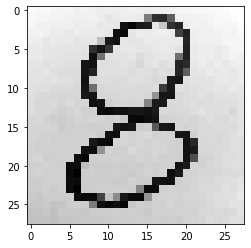

In [23]:
plt.imshow(small, cmap="gray")

In [24]:
invert = (small < 100).astype(int) * 255

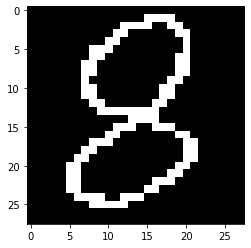

In [25]:
plt.imshow(invert, cmap="gray")

In [26]:
res = (model.predict(np.array([invert.reshape(28,28,1)])))

In [27]:
np.argmax(res)

6

In [ ]:
# np.argmax(res[1])